**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

**Importing Datasets**

In [2]:
train_survivor=pd.read_csv("train.csv")
test_survivor=pd.read_csv("test.csv")

In [3]:
train_survivor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
test_survivor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


**Removing Unused Columns from Training Dataset**

In [5]:
train_survivor=train_survivor.drop(['PassengerId','Name','Ticket'],axis=1)
train_survivor.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


**Checking Null Values**

In [6]:
train_survivor.isnull().any()

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Cabin        True
Embarked     True
dtype: bool

In [7]:
total = train_survivor.isnull().sum().sort_values(ascending=False)
percent_1 = train_survivor.isnull().sum()/train_survivor.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Parch,0,0.0


In [8]:
test_survivor.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [9]:
total = test_survivor.isnull().sum().sort_values(ascending=False)
percent_1 = test_survivor.isnull().sum()/test_survivor.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,327,78.2
Age,86,20.6
Fare,1,0.2
Embarked,0,0.0
Ticket,0,0.0


**Age and Sex**

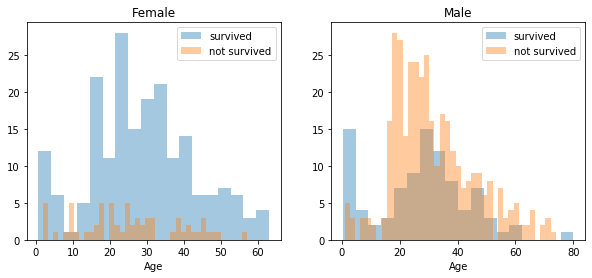

In [10]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_survivor[train_survivor['Sex']=='female']
men = train_survivor[train_survivor['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

**Embarked, Pclass and Sex**

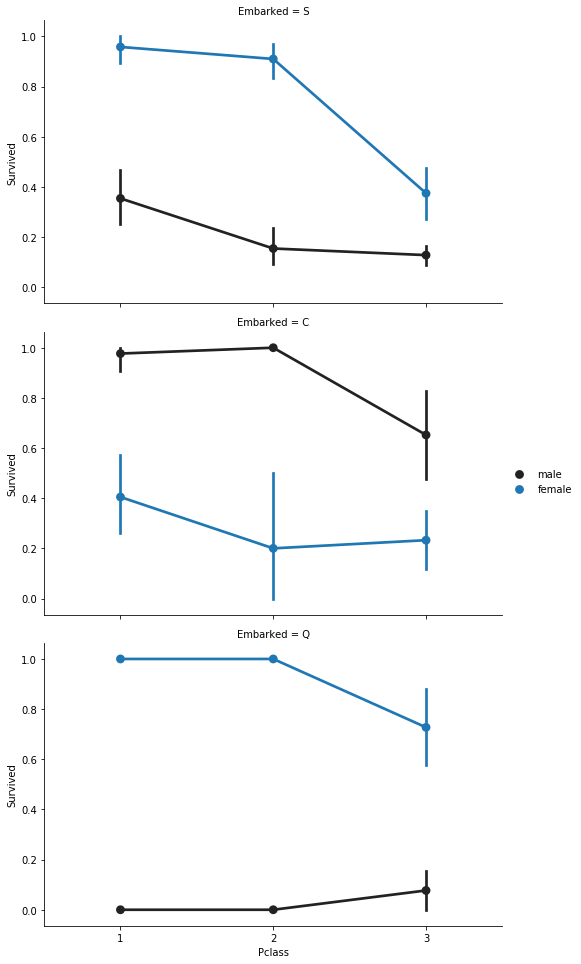

In [11]:
FacetGrid = sns.FacetGrid(train_survivor, row='Embarked', height=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

**PClass**

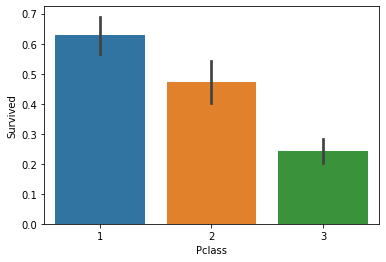

In [12]:
sns.barplot(x='Pclass', y='Survived', data=train_survivor)

**SibSp and Parch**

In [13]:
data = [train_survivor, test_survivor]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train_survivor['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

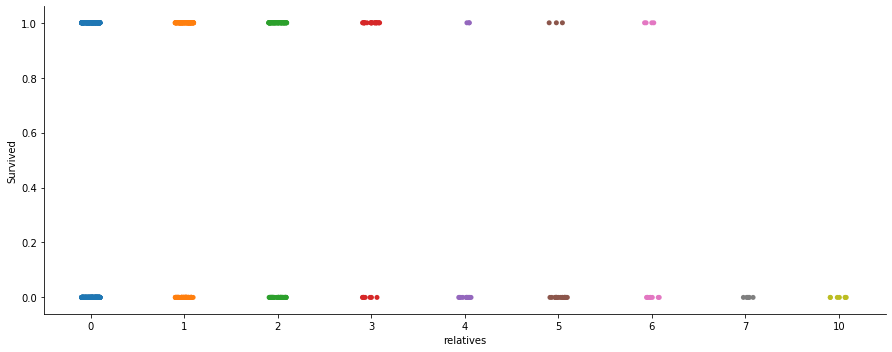

In [14]:
axes = sns.catplot('relatives','Survived', 
                      data=train_survivor, aspect = 2.5, )

**Handling Missing Data**

**Cabin**

In [16]:
train_survivor['Cabin'].value_counts()

B96 B98            4
C23 C25 C27        4
G6                 4
C22 C26            3
F33                3
E101               3
F2                 3
D                  3
E8                 2
E67                2
C78                2
C68                2
D20                2
C52                2
D35                2
E33                2
C124               2
E25                2
C123               2
C92                2
C2                 2
B35                2
B51 B53 B55        2
B18                2
D36                2
B77                2
B22                2
C83                2
F G73              2
B57 B59 B63 B66    2
                  ..
A5                 1
C47                1
F38                1
C54                1
B3                 1
D19                1
C32                1
C7                 1
F G63              1
B82 B84            1
A26                1
T                  1
C49                1
B94                1
C103               1
C148               1
B73          

In [17]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_survivor, test_survivor]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)

train_survivor = train_survivor.drop(['Cabin'], axis=1)
test_survivor = test_survivor.drop(['Cabin'], axis=1)

In [18]:
train_survivor['Deck'].value_counts()

8    687
3     59
2     47
4     33
5     32
1     15
6     13
7      4
0      1
Name: Deck, dtype: int64

**Sex**

In [19]:
data=[train_survivor,test_survivor]
genders = {"male": 0, "female": 1}
for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [20]:
train_survivor['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

**Age**

In [21]:
train_survivor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Sex          891 non-null int64
Age          714 non-null float64
SibSp        891 non-null int64
Parch        891 non-null int64
Fare         891 non-null float64
Embarked     889 non-null object
relatives    891 non-null int64
not_alone    891 non-null int32
Deck         891 non-null int32
dtypes: float64(2), int32(2), int64(6), object(1)
memory usage: 69.7+ KB


In [22]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
data = train_survivor[['Pclass','SibSp','Parch','Fare','Age']]

x_train = data[data['Age'].notnull()].drop(columns='Age')
y_train = data[data['Age'].notnull()]['Age']
x_test = data[data['Age'].isnull()].drop(columns='Age')
y_test = data[data['Age'].isnull()]['Age']

linreg.fit(x_train, y_train)

predicted = linreg.predict(x_test)

train_survivor.Age[train_survivor.Age.isnull()] = predicted
train_survivor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Sex          891 non-null int64
Age          891 non-null float64
SibSp        891 non-null int64
Parch        891 non-null int64
Fare         891 non-null float64
Embarked     889 non-null object
relatives    891 non-null int64
not_alone    891 non-null int32
Deck         891 non-null int32
dtypes: float64(2), int32(2), int64(6), object(1)
memory usage: 69.7+ KB


C:\Users\tahab\Anaconda3\envs\environment_35\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


**Embarked**

In [23]:
common_value = 'S'
data = [train_survivor, test_survivor]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [25]:
train_survivor['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

**Converting DataTypes**

In [26]:
train_survivor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Sex          891 non-null int64
Age          891 non-null float64
SibSp        891 non-null int64
Parch        891 non-null int64
Fare         891 non-null float64
Embarked     891 non-null object
relatives    891 non-null int64
not_alone    891 non-null int32
Deck         891 non-null int32
dtypes: float64(2), int32(2), int64(6), object(1)
memory usage: 69.7+ KB


**Fare**

In [27]:
data = [train_survivor, test_survivor]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

**Embarked**

In [29]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_survivor, test_survivor]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

**Age**

In [37]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
data = test_survivor[['Pclass','SibSp','Parch','Fare','Age']]

x_train = data[data['Age'].notnull()].drop(columns='Age')
y_train = data[data['Age'].notnull()]['Age']
x_test = data[data['Age'].isnull()].drop(columns='Age')
y_test = data[data['Age'].isnull()]['Age']

linreg.fit(x_train, y_train)

predicted = linreg.predict(x_test)

test_survivor.Age[test_survivor.Age.isnull()] = predicted
test_survivor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null int32
Embarked       418 non-null int64
relatives      418 non-null int64
not_alone      418 non-null int32
Deck           418 non-null int32
dtypes: float64(1), int32(3), int64(7), object(2)
memory usage: 37.6+ KB


C:\Users\tahab\Anaconda3\envs\environment_35\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [38]:
data = [test_survivor]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6


In [41]:
train_survivor['Age'].value_counts()

3    223
6    150
5    141
4    127
2    100
1     75
0     75
Name: Age, dtype: int64

In [42]:
test_survivor['Age'].value_counts()

3    122
6     76
4     58
2     57
5     45
1     37
0     23
Name: Age, dtype: int64

In [45]:
test_survivor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int64
Age            418 non-null int32
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null int32
Embarked       418 non-null int64
relatives      418 non-null int64
not_alone      418 non-null int32
Deck           418 non-null int32
dtypes: int32(4), int64(7), object(2)
memory usage: 36.0+ KB


**Fare**

In [46]:
data = [train_survivor, test_survivor]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

In [48]:
test_survivor['Fare'].value_counts()

0    120
2    102
1     96
3     69
4     23
5      8
Name: Fare, dtype: int64

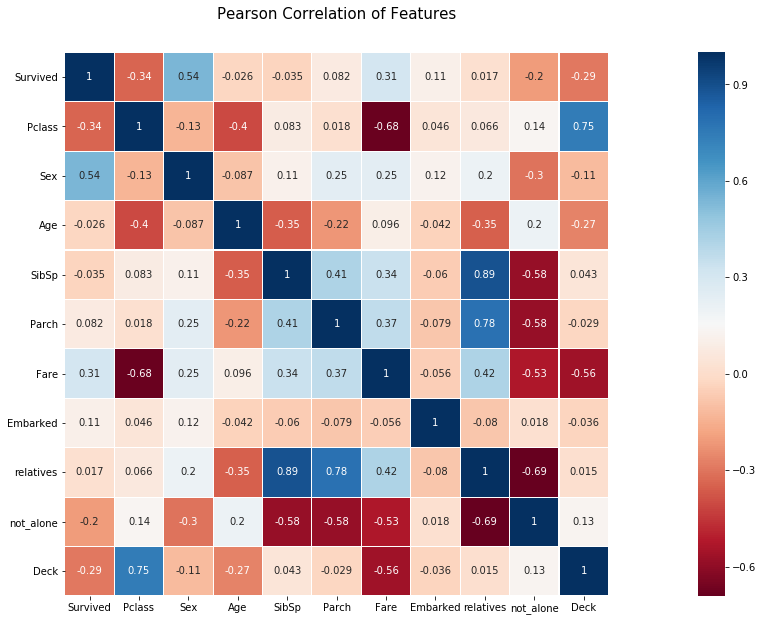

In [51]:
colormap = plt.cm.RdBu
plt.figure(figsize=(32,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_survivor.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

**Building Random Forests and Logistic Regression Models**

In [65]:
X_train = train_survivor.drop("Survived", axis=1)
Y_train = train_survivor["Survived"]
X_test  = test_survivor.drop(['PassengerId','Name','Ticket'], axis=1).copy()

In [66]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
Pclass       418 non-null int64
Sex          418 non-null int64
Age          418 non-null int32
SibSp        418 non-null int64
Parch        418 non-null int64
Fare         418 non-null int32
Embarked     418 non-null int64
relatives    418 non-null int64
not_alone    418 non-null int32
Deck         418 non-null int32
dtypes: int32(4), int64(6)
memory usage: 26.2 KB


In [67]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [68]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

C:\Users\tahab\Anaconda3\envs\environment_35\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [69]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 
              'Random Forest'],
    'Score': [acc_log,acc_random_forest]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head()

,Model
Score,
92.14,Random Forest
81.03,Logistic Regression


**Cross Validation**

In [72]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.75555556 0.78888889 0.74157303 0.83146067 0.87640449 0.85393258
 0.79775281 0.7752809  0.84269663 0.84090909]
Mean: 0.8104454658949042
Standard Deviation: 0.042743633869612954


In [73]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Sex,0.322
Age,0.173
Fare,0.113
Pclass,0.098
Deck,0.096
relatives,0.063
Embarked,0.054
SibSp,0.035
Parch,0.031


In [74]:
train_survivor = train_survivor.drop("not_alone", axis=1)
test_survivor= test_survivor.drop("not_alone", axis=1)

train_survivor = train_survivor.drop("Parch", axis=1)
test_survivor = test_survivor.drop("Parch", axis=1)

In [76]:
X_train = train_survivor.drop("Survived", axis=1)
Y_train = train_survivor["Survived"]
X_test  = test_survivor.drop(['PassengerId','Name','Ticket'], axis=1).copy()

In [77]:
random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

92.14 %


In [79]:
print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 81.03 %


**Hyperparameter Tuning**

In [ ]:
param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}
from sklearn.model_selection import GridSearchCV, cross_val_score
rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
clf.fit(X_train, Y_train)
clf.cv_results_

In [84]:
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 81.82000000000001 %


In [86]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
confusion_matrix(Y_train, predictions)

array([[486,  63],
       [ 95, 247]], dtype=int64)

In [87]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(Y_train, predictions))
print("Recall:",recall_score(Y_train, predictions))

Precision: 0.7967741935483871
Recall: 0.7222222222222222


In [88]:
from sklearn.metrics import f1_score
f1_score(Y_train, predictions)

0.7576687116564418